In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

## Вариант 9

### Зададим все ПФ системы исходя из схемы

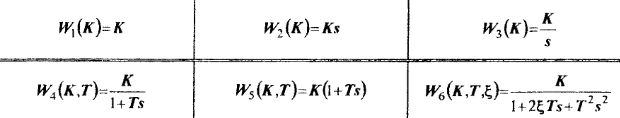
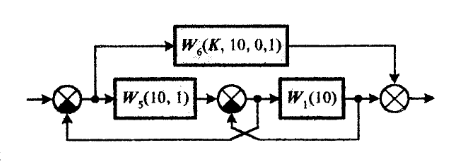

### Напишем W6, W5, W1

In [2]:
def w1() -> int:
    return 10

def w5(s: float) -> float:
    return 10*(1+s)

def w6(k: float, s: float) -> float:
    return k / (1 + 2*10*0.1*s + 10**2*s**2)


### Напишем ПФ разомкнутой системы

Наша передаточная функция будет выглядеть вот так: 

$$Wр(s) = \frac{W_5(s) \bullet W_1(s) + W_6(s)}{1 + W_5(s) + W_1(s)}$$

In [3]:
def transfer_func_open(k: float, s: float) -> float:
    numerator = w5(s)*w1() + w6(k, s)
    denominator = 1 + w5(s) + w1()
    return numerator / denominator

### Зададим входное воздействие
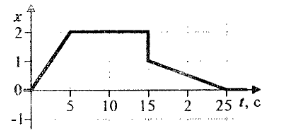

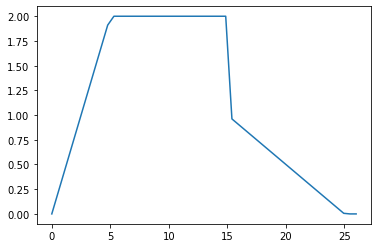

In [4]:
def x(t: float) -> float:
    if 0 <= t <= 5:
        return 0.4*t
    elif 5 <= t <= 15:
        return 2.
    elif 15 <= t <= 25:
        return -0.1*(t-25)
    elif t > 25:
        return 0.

# убедимся в том, что мы правильно задали функцию
t_values = np.linspace(0, 26)
x_values = [x(t) for t in t_values]
plt.plot(t_values, x_values)

### Построение ЛАХ и ФЧХ системы

In [5]:
from ipywidgets import interact, IntSlider, FloatSlider


def convert_to_log_coordinate(freq: float) -> float:
    return 20*np.log10(np.abs(freq))


def plot_specifications(k: float):
    # частота по оси X
    omega = np.logspace(-3, 1, 100)

    # ЛАХ и ФЧХ
    lah = convert_to_log_coordinate(transfer_func_open(k, 1j * omega))
    pfr = np.angle(transfer_func_open(k, 1j * omega), deg=True)
    
    # Построение графиков друг под другом
    
    fig = plt.figure()
    
    # Построение ЛАХ
    lah_plot = fig.add_subplot(2, 1, 1)
    lah_plot.plot(np.log10(omega), lah)
    lah_plot.grid()

    # Построение ФЧХ и линии y=-180(для определения устойчивости)
    pfr_plot = fig.add_subplot(2, 1, 2)
    pfr_plot.axis(ymin=-190, ymax=10)
    pfr_plot.plot(np.log10(omega), pfr)
    pfr_plot.plot(np.log10(omega), len(np.log10(omega))*[-180], '--')
    pfr_plot.grid()


# интерактивный график для подбора коэффициента k
interact(plot_specifications, k=IntSlider(value=350, min=-500, max=500))


interactive(children=(IntSlider(value=350, description='k', max=500, min=-500), Output()), _dom_classes=('widg…

<function __main__.plot_specifications(k: float)>

**Из графиков выше можно сделать вывод, что система будет устойчивой, при K=350**

In [249]:
k = 350

#### Для тех, кто смотрит это с GitHub

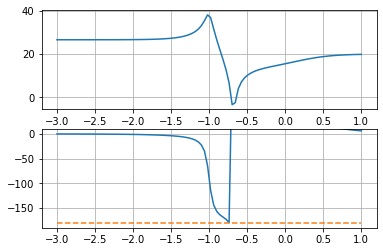

In [253]:
plot_specifications(k)

### Зададим ПФ замкнутой системы

Замкнутая система - это система разомкнутая, с еденичной обратной связью. Следовательно:

$$W_з(s) = \frac{W_р(s)}{1 + W_р(s)}$$

In [252]:
def transfer_func_close(k: float, s: float) -> float:
    open_tf = transfer_func_open(k, s)
    return open_tf / (1 + open_tf)

### Представим ПФ в форме дифференциальных уравнений

#### Для начала мы преобразуем нашу ПФ, чтобы с ней было легче работать
1. Преобразуем ПФ разомкнутой системы к математическому виду

$$W_р(s) = \frac{W_5(s) \bullet W_1(s) + W_6(s)}{1 + W_5(s) + W_1(s)} = \frac{10^4s^3 + 10200s^2 + 300s + 100 + k}{10^3s^3 + 2120s^2 + 52s + 21}$$

2. Преобразуем ПФ замкнутой системы к математическому виду

$$W_з(s) = \frac{W_р(s)}{1 + W_р(s)} = \frac{10^4s^3 + 10200s^2 + 300s + 100 + k}{11 \bullet 10^3s^3 + 12320s^2 + 352s + 121 + k}$$

3. Получим дифференциальное уравнение

    **TODO**

### Зададим дифф. уравнение от $W_з$ и построим переходной процесс

In [1]:
def diff_form_close_transfer_func():
    # TODO
    pass

### Напишем функцию IV из мизрахички и проверим её работу на сигнале *err*

In [2]:
def iv(err, t, tau):
    de_dt = np.diff(err)/(t[1]-t[0])
    return np.sum(err**2) + tau**2 * np.sum(de_dt**2)